# Laptop Price Prediction

---

## 1. Problem Statement
We want to understand which factors most influence the selling price of a laptop.  
Given a set of characteristics (brand, screen size & resolution, processor, RAM, storage type & size, GPU, operating system, weight), our goal is to build insights and ultimately a predictive model that can estimate the market price of a laptop.

---

## 2. Objective
- Perform data cleaning and feature engineering to prepare the data for modeling.  
- Visualize univariate distributions and bivariate relationships to discover patterns and correlations.  
- Identify and handle outliers, missing values, or inconsistent feature encodings.  
- Generate new features (e.g., pixel count from screen resolution, storage total capacity, CPU speed) that may improve predictive power.  
- Summarize key findings to guide the choice of modeling techniques in downstream tasks.

---

## 3. Dataset Description
**Source:** (e.g. Kaggle “Laptop Price” dataset)  
**Size:** ~1,300 records × 12 columns

| Column             | Type      | Description                                                     |
|--------------------|-----------|-----------------------------------------------------------------|
| `Company`          | Categorical | Manufacturer (e.g., Apple, HP, Dell)                          |
| `TypeName`         | Categorical | Laptop category (Ultrabook, Notebook, Gaming, etc.)           |
| `Inches`           | Numeric     | Screen diagonal size (in inches)                              |
| `ScreenResolution` | Categorical | Screen specs with resolution (e.g., “Full HD 1920x1080”)      |
| `Cpu`              | Categorical | Processor model and base clock (e.g., “Intel Core i5 2.3GHz”) |
| `Ram`              | Categorical | Amount of system memory (e.g., “8GB”)                         |
| `Memory`           | Categorical | Storage type & capacity (e.g., “256GB SSD”, “1TB HDD”)        |
| `Gpu`              | Categorical | Graphics card model                                           |
| `OpSys`            | Categorical | Operating system installed                                    |
| `Weight`           | Numeric     | Device weight in kilograms (e.g., “1.37kg”)                   |
| `Price`            | Numeric     | Price in INR (target variable)                                |

---

## 4. EDA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/laptop_data.csv")

df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
891,HP,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg,74538.72
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,26586.72
458,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25kg,95850.72
568,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,18328.32
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.duplicated().sum()

np.int64(29)

In [7]:
# Function to find duplicated rows in a dataframe
def get_duplicate_rows(df):
    # Return rows that appear more than once
    return df[df.duplicated(keep=False)]


get_duplicate_rows(df)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [8]:
# Function to check for duplicates of row 1302
def check_duplicates_for_row_1302(df):
    # Get row 1302 data
    target_row = df.iloc[1302]

    # Find duplicates by comparing all rows with row 1302
    duplicates = df[df.eq(target_row).all(axis=1)]

    # Get indices of duplicates (excluding 1302 itself)
    duplicate_indices = duplicates.index[duplicates.index != 1302].tolist()

    if len(duplicate_indices) > 0:
        print(f"Found duplicates at indices: {duplicate_indices}")
        print(df.iloc[duplicate_indices])
    else:
        print("No duplicates found for row 1302")


check_duplicates_for_row_1302(df)

Found duplicates at indices: [1172, 1274, 1288]
     Company  TypeName  Inches ScreenResolution  \
1172    Asus  Notebook    15.6         1366x768   
1274    Asus  Notebook    15.6         1366x768   
1288    Asus  Notebook    15.6         1366x768   

                                       Cpu  Ram     Memory                Gpu  \
1172  Intel Celeron Dual Core N3050 1.6GHz  4GB  500GB HDD  Intel HD Graphics   
1274  Intel Celeron Dual Core N3050 1.6GHz  4GB  500GB HDD  Intel HD Graphics   
1288  Intel Celeron Dual Core N3050 1.6GHz  4GB  500GB HDD  Intel HD Graphics   

           OpSys Weight     Price  
1172  Windows 10  2.2kg  19660.32  
1274  Windows 10  2.2kg  19660.32  
1288  Windows 10  2.2kg  19660.32  


There are 29 duplicated entries.

In [9]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

In [10]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
209,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,31808.16
472,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8GB,128GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,67932.00
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78kg,127818.72
323,HP,Notebook,15.6,IPS Panel Full HD 1366x768,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Intel UHD Graphics 620,Windows 10,2.1kg,48058.56
1108,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,1TB HDD,AMD Radeon R4,Windows 10,2.1kg,21205.44


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [ ]:
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")

In [ ]:
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float32")

In [ ]:
df["Price"] = df["Price"].apply(round)
df["Price"] = df["Price"].astype("int64")

- Removed 'GB' from values of `Ram` column and changed it to `int32` dtype.
- Removed 'kg' from values of `Weight` column and changed it to `float32` dtype.
- Rounded off the prices from `Price` column and changed it to `int64` dtype.

### Univariate Analysis

<Figure size 1000x600 with 0 Axes>

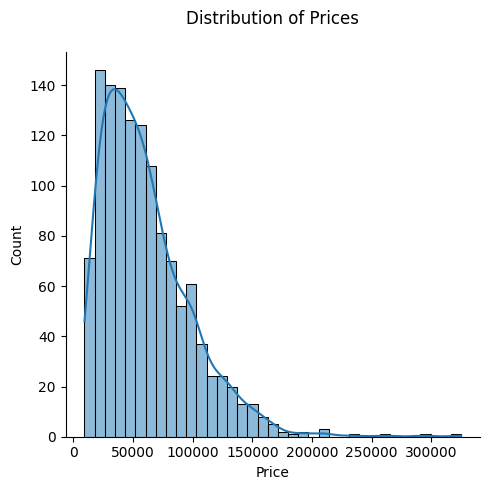

In [15]:
plt.figure(figsize=(10, 6))
sns.displot(df["Price"], kde=True)
plt.title("Distribution of Prices", pad=20)  # Added padding to prevent title cutoff
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("assets/price_distribution.png")
plt.show()

- The plot of distribution of prices is skewed. The count of cheaper laptops is more than the expensive ones.

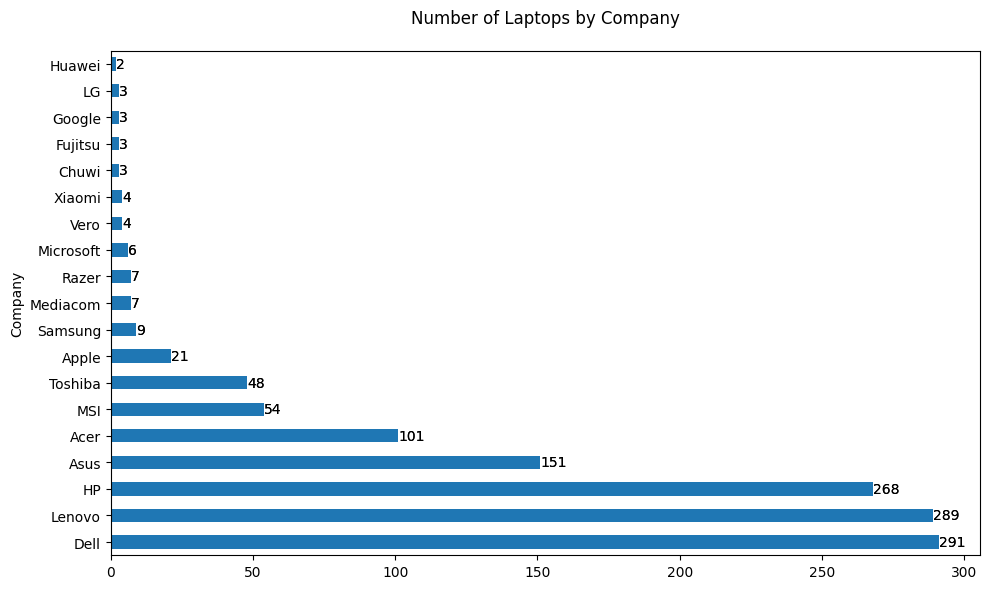

In [16]:
df["Company"].value_counts().plot(kind="barh", figsize=(10, 6))
plt.title(
    "Number of Laptops by Company", pad=20
)  # Added padding to prevent title cutoff
for i, v in enumerate(df["Company"].value_counts()):
    plt.text(v, i, str(v), va="center")  # Add value annotations to each bar
    plt.text(v, i, str(v), va="center")  # Add value annotations to each bar
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("assets/laptops_count_by_company.png")
plt.show()

- Our datasets have the following brand's laptops the most:
    - Dell (291)
    - Lenovo (289)
    - HP (268)
    - Asus (151)
    - Acer (101)

In [17]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
328,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,71129
637,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.42,13267
180,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,55891
411,Lenovo,Ultrabook,14.0,IPS Panel Full HD 2560x1440,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.70,103523
533,Mediacom,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.20,19660


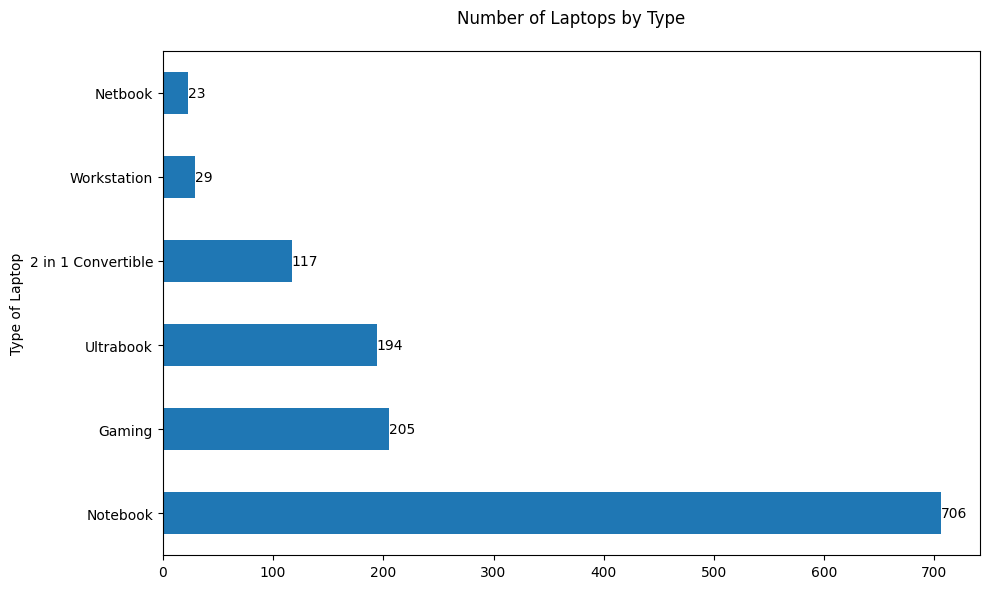

In [18]:
df["TypeName"].value_counts().plot(kind="barh", figsize=(10, 6))
plt.ylabel("Type of Laptop")
plt.title("Number of Laptops by Type", pad=20)  # Added padding to prevent title cutoff
for i, v in enumerate(df["TypeName"].value_counts()):
    plt.text(v, i, str(v), va="center")  # Add value annotations to each bar
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("assets/laptops_count_by_type.png")
plt.show()

- The most laptops have type: Notebook (706), Gaming (205), and Ultrabook (194)

In [19]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [20]:
print(df[df["OpSys"] == "Windows 10"]["Price"].median())
print(df[df["OpSys"] == "Windows 10 S"]["Price"].median())

55678.0
64708.5


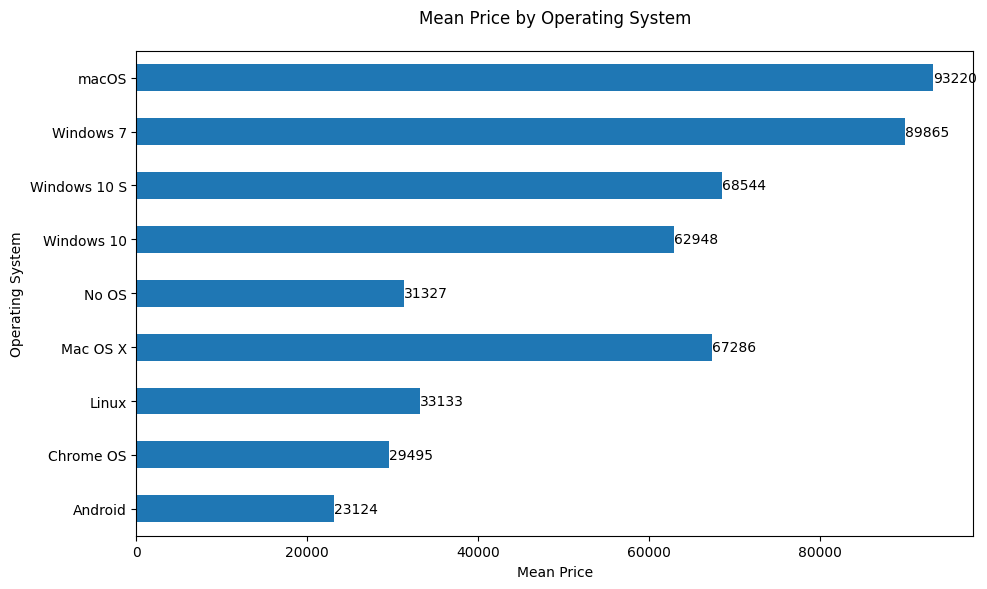

In [21]:
df.groupby("OpSys")["Price"].mean().apply(round).plot(kind="barh", figsize=(10, 6))
plt.title(
    "Mean Price by Operating System", pad=20
)  # Added padding to prevent title cutoff
plt.xlabel("Mean Price")
plt.ylabel("Operating System")
for i, v in enumerate(df.groupby("OpSys")["Price"].mean().apply(round)):
    plt.text(v, i, str(v), va="center")  # Add value annotations to each bar
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("assets/mean_price_by_os.png")
plt.show()

In [22]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
114,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,86793
1246,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,46620
88,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,77203
1032,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,63499
544,Asus,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.00,18595


In [23]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [24]:
print("Windows 10 Price Statistics:")
print(df[df["OpSys"] == "Windows 10"]["Price"].describe())

print("\n----------------------------------------\n")

print("Windows 10 S Price Statistics:")
print(df[df["OpSys"] == "Windows 10 S"]["Price"].describe())

Windows 10 Price Statistics:
count      1047.000000
mean      62948.212034
std       37138.573297
min       10224.000000
25%       35218.500000
50%       55678.000000
75%       81848.500000
max      324955.000000
Name: Price, dtype: float64

----------------------------------------

Windows 10 S Price Statistics:
count         8.000000
mean      68543.625000
std       41955.057233
min       14811.000000
25%       44049.250000
50%       64708.500000
75%       96768.000000
max      137942.000000
Name: Price, dtype: float64


In [ ]:
df["OpSys"] = df["OpSys"].str.replace("Windows 10 S", "Windows 10")

In [26]:
df["OpSys"].value_counts()

OpSys
Windows 10    1055
No OS           66
Linux           58
Windows 7       45
Chrome OS       27
macOS           13
Mac OS X         8
Android          2
Name: count, dtype: int64

- Merged 'Windows 10 S' into 'Windows 10' in `OpSys` column.

In [27]:
print("macOS Price Statistics:")
print(df[df["OpSys"] == "macOS"]["Price"].describe())

print("\n----------------------------------------\n")

print("Mac OS X Price Statistics:")
print(df[df["OpSys"] == "Mac OS X"]["Price"].describe())

macOS Price Statistics:
count        13.000000
mean      93220.384615
std       31352.097302
min       47896.000000
25%       71379.000000
50%       80908.000000
75%      108691.000000
max      152274.000000
Name: Price, dtype: float64

----------------------------------------

Mac OS X Price Statistics:
count         8.00000
mean      67285.87500
std       19934.04369
min       51096.00000
25%       57209.50000
50%       62018.00000
75%       68424.75000
max      114018.00000
Name: Price, dtype: float64


In [ ]:
df["OpSys"] = df["OpSys"].str.replace("Mac OS X", "macOS X")

- Renamed 'Mac OS X' to 'macOS X' in `OpSys` column.

In [ ]:
df.drop(df[df["OpSys"] == "Android"].index, inplace=True)

- Removed Android type laptops for having very less data.

In [30]:
df["OpSys"].value_counts()

OpSys
Windows 10    1055
No OS           66
Linux           58
Windows 7       45
Chrome OS       27
macOS           13
macOS X          8
Name: count, dtype: int64

In [31]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
628,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,1.50,34046
240,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,31382
44,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53227
732,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,34632
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,44702


In [32]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

In [33]:
df["HasIpsPanel"] = (
    df["ScreenResolution"].str.contains("IPS", case=False, na=False).astype(int)
)
df["HasIpsPanel"].value_counts()

HasIpsPanel
0    917
1    355
Name: count, dtype: int64

In [34]:
df["HasTouchScreen"] = (
    df["ScreenResolution"].str.contains("Touchscreen", case=False, na=False).astype(int)
)
df["HasTouchScreen"].value_counts()

HasTouchScreen
0    1086
1     186
Name: count, dtype: int64

- Created `HasIpsPanel` and `HasTouchScreen` features from `ScreenResolution` column.

In [ ]:
df["temp_screen"] = df["ScreenResolution"]

In [ ]:
df["temp_screen"] = df["temp_screen"].str.replace("Touchscreen", "")
df["temp_screen"] = df["temp_screen"].str.replace("IPS Panel", "")

In [37]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,temp_screen
355,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,51730,0,0,Full HD 1920x1080
132,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,47100,1,0,Full HD 1920x1080
1045,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD + 500GB HDD,Intel HD Graphics 520,Windows 10,1.84,112066,0,0,Full HD 1920x1080
570,HP,Workstation,17.3,1600x900,Intel Core i5 7440HQ 2.8GHz,8,500GB HDD,Nvidia Quadro M1200,Windows 10,3.14,99154,0,0,1600x900
65,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.80,105654,0,0,Full HD 1920x1080


In [38]:
df["temp_screen"].value_counts()

temp_screen
Full HD 1920x1080            505
1366x768                     262
 Full HD 1920x1080           226
 Full HD /  1920x1080         51
Full HD /  1920x1080          47
 1366x768                     23
1600x900                      23
Quad HD+ /  3200x1800         15
 4K Ultra HD 3840x2160        12
 4K Ultra HD /  3840x2160     11
 2560x1440                    11
4K Ultra HD /  3840x2160      10
4K Ultra HD 3840x2160          7
 Retina Display 2560x1600      6
 Retina Display 2304x1440      6
 2256x1504                     6
  2560x1440                    5
1440x900                       4
 Retina Display 2880x1800      4
 Quad HD+ /  3200x1800         4
 2400x1600                     3
 Quad HD+ 2560x1440            3
1920x1080                      3
  1366x768                     3
Quad HD+ 3200x1800             3
2560x1440                      3
  1920x1200                    2
 Quad HD+ 3200x1800            2
  / 4K Ultra HD 3840x2160      2
 Full HD 2160x1440             

In [ ]:
import re


def extract_resolution(res_string):
    match = re.search(r"(\d{3,4})\s*[xX]\s*(\d{3,4})", res_string)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

In [ ]:
df[["ResWidth", "ResHeight"]] = df["temp_screen"].apply(
    lambda x: pd.Series(extract_resolution(str(x)))
)

- Created `ResWidth` and `ResHeight` columns from `ScreenResolution`

In [ ]:
def classify_resolution(w, h):
    if w is None or h is None:
        return "Unknown"
    total_pixels = w * h
    if total_pixels <= 1366 * 768:
        return "Low"
    elif total_pixels <= 1920 * 1080:
        return "Mid"
    elif total_pixels <= 2560 * 1600:
        return "High"
    else:
        return "Ultra"

In [ ]:
df["ResCategory"] = df.apply(
    lambda row: classify_resolution(row["ResWidth"], row["ResHeight"]), axis=1
)

- Created `ResCategory` column such that:
    - if width * height <= 1366 * 768 then `Low`
    - if width * height <= 1920 * 1080 then `Mid`
    - if width * height <= 2560 * 1600 then `High`
    - if any higher than that then `Ultra`

In [ ]:
def calculate_ppi(row):
    w, h, inches = row["ResWidth"], row["ResHeight"], row["Inches"]
    if pd.notnull(w) and pd.notnull(h) and pd.notnull(inches) and inches != 0:
        return round(((w**2 + h**2) ** 0.5) / inches, 2)
    return None

In [ ]:
df["Ppi"] = df.apply(calculate_ppi, axis=1)

- Created `Ppi` column using the following formula:
    ```python
    Ppi = (width**2 + height**2)**0.5 / inches
    ```

In [ ]:
df.drop(columns=["temp_screen", "ScreenResolution"], inplace=True)

- Dropped `ScreenResolution` column.

In [46]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,ResWidth,ResHeight,ResCategory,Ppi
386,Lenovo,Notebook,13.3,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,29251,1,0,1920,1080,Mid,165.63
836,Asus,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128884,0,0,1920,1080,Mid,127.34
925,Dell,Notebook,15.6,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.95,38889,0,0,1366,768,Low,100.45
1233,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85141,0,0,1920,1080,Mid,127.34
644,Acer,Notebook,15.6,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,23976,0,0,1366,768,Low,100.45


In [47]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                11
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [ ]:
def convert_to_gb(part):
    # Extract numeric value
    match = re.search(r"(\d+\.?\d*)", part)
    if match:
        size = float(match.group(1))
        if "TB" in part:
            return int(size * 1000)  # Convert TB to GB
        else:
            return int(size)  # Already in GB
    return 0


def parse_storage(row):
    ssd = hdd = flash = hybrid = 0
    parts = row.split("+")
    for part in parts:
        part = part.strip()
        if "SSD" in part and "Flash" not in part:
            ssd += convert_to_gb(part)
        elif "HDD" in part:
            hdd += convert_to_gb(part)
        elif "Flash Storage" in part or "Flash" in part:
            flash += convert_to_gb(part)
        elif "Hybrid" in part:
            hybrid += convert_to_gb(part)
    return pd.Series([ssd, hdd, flash, hybrid])

In [ ]:
df[["Ssd", "Hdd", "Flash", "Hybrid"]] = df["Memory"].apply(parse_storage)

In [ ]:
df.drop(columns=["Memory"], inplace=True)

In [52]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,ResWidth,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid
93,Dell,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,8,Nvidia GeForce GTX 1060,Windows 10,2.65,63670,0,0,1920,1080,Mid,141.21,256,0,0,0
790,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX1060,Windows 10,2.24,71342,0,0,1920,1080,Mid,141.21,128,1000,0,0
1030,HP,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,Windows 10,1.64,51841,0,0,1366,768,Low,111.94,256,0,0,0
568,Lenovo,Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,4,Intel HD Graphics 505,Windows 10,2.20,18328,0,0,1920,1080,Mid,141.21,0,500,0,0
739,Acer,Notebook,15.6,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,Windows 10,2.40,21887,0,0,1366,768,Low,100.45,0,500,0,0


In [68]:
# CPU with Intel Core i3
intel_i3_laptops = df["Cpu"].str.contains("Intel Core i3", case=False, na=False)

df[intel_i3_laptops]["Cpu"].value_counts()

Cpu
Intel Core i3 6006U 2GHz      64
Intel Core i3 7100U 2.4GHz    35
Intel Core i3 6006U 2.0GHz    16
Intel Core i3 6100U 2.3GHz     9
Intel Core i3 7130U 2.7GHz     8
Intel Core i3 6006U 2.2GHz     1
Intel Core i3 6100U 2.1GHz     1
Name: count, dtype: int64

In [62]:
# CPU with Intel Core i5
intel_i5_laptops = df["Cpu"].str.contains("Intel Core i5", case=False, na=False)

df[intel_i5_laptops]["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i5 7300HQ 2.5GHz     33
Intel Core i5 7300U 2.6GHz      14
Intel Core i5 6300U 2.4GHz      11
Intel Core i5 6300HQ 2.3GHz      7
Intel Core i5 7440HQ 2.8GHz      5
Intel Core i5 7Y54 1.2GHz        3
Intel Core i5 1.6GHz             3
Intel Core i5 2.3GHz             2
Intel Core i5 3.1GHz             2
Intel Core i5 1.8GHz             2
Intel Core i5 7Y57 1.2GHz        2
Intel Core i5 2.0GHz             1
Intel Core i5 6440HQ 2.6GHz      1
Intel Core i5 2.9GHz             1
Intel Core i5 1.3GHz             1
Intel Core i5 7500U 2.7GHz       1
Intel Core i5 6260U 1.8GHz       1
Intel Core i5 7200U 2.50GHz      1
Intel Core i5 7200U 2.70GHz      1
Intel Core i5 7200U 2.7GHz       1
Name: count, dtype: int64

In [63]:
# CPU with Intel Core i3
intel_i7_laptops = df["Cpu"].str.contains("Intel Core i7", case=False, na=False)

df[intel_i7_laptops]["Cpu"].value_counts()

Cpu
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i7 6500U 2.5GHz      41
Intel Core i7 6700HQ 2.6GHz     41
Intel Core i7 6600U 2.6GHz      18
Intel Core i7 7600U 2.8GHz      13
Intel Core i7 6820HK 2.7GHz     10
Intel Core i7 6820HQ 2.7GHz      7
Intel Core i7 7820HK 2.9GHz      7
Intel Core i7 7Y75 1.3GHz        5
Intel Core i7 7820HQ 2.9GHz      5
Intel Core i7 7660U 2.5GHz       3
Intel Core i7 8650U 1.9GHz       2
Intel Core i7 6500U 2.50GHz      2
Intel Core i7 7560U 2.4GHz       2
Intel Core i7 2.9GHz             1
Intel Core i7 2.7GHz             1
Intel Core i7 2.2GHz             1
Intel Core i7 2.8GHz             1
Intel Core i7 6920HQ 2.9GHz      1
Intel Core i7 7700HQ 2.7GHz      1
Intel Core i7 7500U 2.5GHz       1
Intel Core i7 6560U 2.2GHz       1
Name: count, dtype: int64

In [64]:
# CPU without Intel Chip
no_intel_laptops = ~df["Cpu"].str.contains("Intel", case=False, na=False)
df[no_intel_laptops]["Cpu"].value_counts()

Cpu
AMD A9-Series 9420 3GHz            11
AMD A6-Series 9220 2.5GHz           7
AMD A12-Series 9720P 3.6GHz         5
AMD A8-Series 7410 2.2GHz           4
AMD Ryzen 1700 3GHz                 3
AMD A10-Series 9600P 2.4GHz         2
AMD A6-Series A6-9220 2.5GHz        2
AMD A9-Series A9-9420 3GHz          2
AMD A10-Series 9620P 2.5GHz         2
AMD A12-Series 9720P 2.7GHz         2
AMD A10-Series A10-9620P 2.5GHz     2
AMD E-Series E2-9000e 1.5GHz        2
AMD E-Series 7110 1.8GHz            2
AMD E-Series 9000e 1.5GHz           1
AMD E-Series 6110 1.5GHz            1
AMD A6-Series 9220 2.9GHz           1
AMD E-Series E2-6110 1.5GHz         1
AMD FX 9830P 3GHz                   1
AMD Ryzen 1600 3.2GHz               1
AMD E-Series E2-9000 2.2GHz         1
AMD A9-Series 9420 2.9GHz           1
AMD A6-Series 7310 2GHz             1
AMD A12-Series 9700P 2.5GHz         1
AMD A4-Series 7210 2.2GHz           1
AMD FX 8800P 2.1GHz                 1
Samsung Cortex A72&A53 2.0GHz       1
AMD E-Se

In [ ]:
def simplify_cpu(cpu):
    if "Intel Core i3" in cpu:
        return "Intel Core i3"
    elif "Intel Core i5" in cpu:
        return "Intel Core i5"
    elif "Intel Core i7" in cpu:
        return "Intel Core i7"
    elif "Intel Core i9" in cpu:
        return "Intel Core i9"
    elif "Intel" in cpu:
        return "Other Intel"
    elif "AMD Ryzen" in cpu:
        return "AMD Ryzen"
    elif "AMD A4" in cpu:
        return "AMD A4"
    elif "AMD A6" in cpu:
        return "AMD A6"
    elif "AMD A8" in cpu:
        return "AMD A8"
    elif "AMD A9" in cpu:
        return "AMD A9"
    elif "AMD A10" in cpu:
        return "AMD A10"
    elif "AMD A12" in cpu:
        return "AMD A12"
    elif "AMD E-Series" in cpu:
        return "AMD E-Series"
    elif "AMD FX" in cpu:
        return "AMD FX"
    elif "Samsung" in cpu:
        return "Samsung"
    else:
        return "Other"

In [ ]:
df["CpuCategory"] = df["Cpu"].apply(simplify_cpu)

In [71]:
df["CpuCategory"].value_counts()

CpuCategory
Intel Core i7    515
Intel Core i5    423
Other Intel      139
Intel Core i3    134
AMD A9            15
AMD A6            11
AMD E-Series       9
AMD A12            8
AMD A10            6
AMD Ryzen          4
AMD A8             4
AMD FX             2
AMD A4             1
Samsung            1
Name: count, dtype: int64

In [72]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,ResWidth,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory
1265,Lenovo,Notebook,15.6,Intel Core i7 6700HQ 2.6GHz,8,Nvidia GeForce GTX 960M,Windows 10,2.60,47899,1,0,1920,1080,Mid,141.21,0,1000,0,0,Intel Core i7
492,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX 1050,Windows 10,1.99,71928,0,0,1920,1080,Mid,141.21,128,1000,0,0,Intel Core i7
659,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,Nvidia GeForce GTX 1070,Windows 10,4.42,167692,1,0,3840,2160,Ultra,254.67,512,1000,0,0,Intel Core i7
397,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.90,49977,1,0,1920,1080,Mid,157.35,256,0,0,0,Intel Core i5
720,Lenovo,Ultrabook,14.0,Intel Core i7 6500U 2.5GHz,8,Intel HD Graphics 520,Windows 10,1.17,89864,1,0,2560,1440,High,209.80,512,0,0,0,Intel Core i7


In [ ]:
df["CpuSpeedGhz"] = df["Cpu"].str.extract(r"(\d+(?:\.\d+)?)GHz").astype(float)

In [82]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,...,ResWidth,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz
1074,Lenovo,Ultrabook,12.5,Intel Core i7 6500U 2.5GHz,8,Intel HD Graphics 520,Windows 10,1.30,91295,1,...,1920,1080,Mid,176.23,256,0,0,0,Intel Core i7,2.5
186,Dell,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1050,Windows 10,2.06,127712,0,...,3840,2160,Ultra,282.42,512,0,0,0,Intel Core i7,2.8
942,Acer,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,Windows 10,2.23,32980,0,...,1366,768,Low,100.45,0,500,0,0,Intel Core i5,2.5
1125,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,8,Intel HD Graphics 520,Windows 10,1.80,88924,1,...,1920,1080,Mid,157.35,256,0,0,0,Intel Core i7,2.5
271,Asus,Gaming,17.3,AMD Ryzen 1700 3GHz,16,AMD Radeon RX 580,Windows 10,3.20,82531,0,...,1920,1080,Mid,127.34,256,1000,0,0,AMD Ryzen,3.0


In [84]:
df["CpuSpeedGhz"].isna().sum()

np.int64(0)

In [ ]:
df.drop(columns=["Cpu"], inplace=True)

In [86]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,ResWidth,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz
367,Lenovo,Gaming,15.6,8,Nvidia GeForce GTX 1050,No OS,2.40,43104,1,0,1920,1080,Mid,141.21,128,1000,0,0,Intel Core i5,2.5
532,Asus,Notebook,15.6,8,Nvidia GeForce GTX 960M,Windows 10,2.00,69211,1,0,3840,2160,Ultra,282.42,256,1000,0,0,Intel Core i7,2.7
1028,Dell,Ultrabook,13.3,8,Intel HD Graphics 620,Windows 10,1.29,86527,0,1,3200,1800,Ultra,276.05,256,0,0,0,Intel Core i5,2.5
1179,HP,Notebook,15.6,4,Intel HD Graphics 520,Windows 10,2.07,34632,0,0,1366,768,Low,100.45,0,500,0,0,Intel Core i3,2.3
776,Lenovo,Notebook,15.6,16,Nvidia Quadro M2000M,Windows 7,2.50,126274,0,0,3840,2160,Ultra,282.42,512,0,0,0,Intel Core i7,2.7


In [88]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [93]:
intel_gpu_laptops = df["Gpu"].str.contains("Intel", case=False, na=False)
df[intel_gpu_laptops]["Gpu"].value_counts().sum()

np.int64(701)

In [94]:
nvidia_gpu_laptops = df["Gpu"].str.contains("Nvidia", case=False, na=False)
df[nvidia_gpu_laptops]["Gpu"].value_counts().sum()

np.int64(396)

In [95]:
amd_gpu_laptops = df["Gpu"].str.contains("AMD", case=False, na=False)
df[amd_gpu_laptops]["Gpu"].value_counts().sum()

np.int64(174)

In [96]:
other_gpu_laptops = ~intel_gpu_laptops & ~nvidia_gpu_laptops & ~amd_gpu_laptops
df[other_gpu_laptops]["Gpu"].value_counts().sum()

np.int64(1)

In [98]:
# Remove rows with 'Other' GPU
df.drop(df[other_gpu_laptops].index, inplace=True)

In [102]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,ResWidth,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz
1064,MSI,Gaming,15.6,16,Nvidia GeForce GTX 1060,Windows 10,1.80,102777,0,0,1920,1080,Mid,141.21,256,1000,0,0,Intel Core i7,2.6
875,Dell,Ultrabook,12.5,8,Intel HD Graphics 620,Windows 10,1.60,90043,0,0,1920,1080,Mid,176.23,256,0,0,0,Intel Core i7,2.8
930,Lenovo,Notebook,15.6,4,Intel HD Graphics 505,Windows 10,2.20,16464,0,0,1366,768,Low,100.45,0,1000,0,0,Other Intel,1.1
685,Dell,Gaming,15.6,16,Nvidia GeForce GTX 1070,Windows 10,3.49,149917,0,0,1920,1080,Mid,141.21,256,1000,0,0,Intel Core i7,2.9
1246,Dell,Notebook,14.0,4,Intel HD Graphics 620,Windows 10,1.60,46620,0,0,1366,768,Low,111.94,0,500,0,0,Intel Core i5,2.5


In [104]:
df[intel_gpu_laptops]["Gpu"].value_counts()

C:\Users\sujee\AppData\Local\Temp\ipykernel_12744\310209280.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[intel_gpu_laptops]['Gpu'].value_counts()


Gpu
Intel HD Graphics 620           279
Intel HD Graphics 520           181
Intel UHD Graphics 620           68
Intel HD Graphics 500            39
Intel HD Graphics 400            31
Intel HD Graphics                22
Intel HD Graphics 615            14
Intel HD Graphics 515            13
Intel HD Graphics 505            12
Intel HD Graphics 405             9
Intel Iris Plus Graphics 640      8
Intel HD Graphics 6000            5
Intel HD Graphics 630             4
Intel HD Graphics 510             4
Intel Iris Plus Graphics 650      2
Intel HD Graphics 5300            2
Intel Iris Graphics 540           2
Intel Iris Pro Graphics           1
Intel Iris Graphics 550           1
Intel HD Graphics 530             1
Intel Graphics 620                1
Intel HD Graphics 540             1
Intel HD Graphics 620             1
Name: count, dtype: int64

In [105]:
df[nvidia_gpu_laptops]["Gpu"].value_counts()

C:\Users\sujee\AppData\Local\Temp\ipykernel_12744\1181567436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[nvidia_gpu_laptops]['Gpu'].value_counts()


Gpu
Nvidia GeForce GTX 1050           66
Nvidia GeForce GTX 1060           48
Nvidia GeForce 940MX              43
Nvidia GeForce GTX 1070           30
Nvidia GeForce GTX 1050 Ti        28
Nvidia GeForce 930MX              20
Nvidia GeForce MX150              15
Nvidia GeForce 920MX              13
Nvidia GeForce GTX 960M           12
Nvidia GeForce GTX 980M           10
Nvidia Quadro M1200                9
Nvidia GeForce GTX 950M            7
Nvidia GeForce MX130               6
Nvidia GeForce GTX 1080            6
Nvidia GeForce 930M                6
Nvidia GeForce 930MX               5
Nvidia GeForce GTX 970M            5
Nvidia GeForce 920MX               5
Nvidia Quadro M620                 5
Nvidia GeForce GT 940MX            5
Nvidia GeForce GTX 940MX           4
Nvidia GeForce GTX 965M            4
Nvidia Quadro M1000M               4
Nvidia GeForce 920M                4
Nvidia GeForce 150MX               3
Nvidia GeForce GTX 1050M           3
Nvidia Quadro M2200M              

In [106]:
df[amd_gpu_laptops]["Gpu"].value_counts()

C:\Users\sujee\AppData\Local\Temp\ipykernel_12744\3255543326.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[amd_gpu_laptops]['Gpu'].value_counts()


Gpu
AMD Radeon 530            41
AMD Radeon R5 M430        20
AMD Radeon 520            17
AMD Radeon R7 M445        14
AMD Radeon R5             11
AMD Radeon R5 M420         8
AMD Radeon R4 Graphics     5
AMD Radeon RX 580          5
AMD Radeon R5 M330         5
AMD Radeon R2              5
AMD Radeon R2 Graphics     4
AMD Radeon RX 550          4
AMD Radeon R7 M440         3
AMD Radeon R5 M420X        3
AMD Radeon R4              3
AMD Radeon R7 M460         2
AMD Radeon RX 540          2
AMD FirePro W4190M         2
AMD Radeon Pro 560         1
AMD Radeon Pro 555         1
AMD Radeon Pro 455         1
AMD Radeon RX 560          1
AMD FirePro W5130M         1
AMD Radeon R5 430          1
AMD R17M-M1-70             1
AMD R4 Graphics            1
AMD Radeon R7              1
AMD Radeon 540             1
AMD Radeon R7 Graphics     1
AMD Radeon R5 520          1
AMD Radeon R7 M465         1
AMD Radeon R3              1
AMD Radeon R7 M365X        1
AMD Radeon R9 M385         1
AMD FirePr

In [ ]:
def categorize_intel_gpu(gpu):
    gpu = gpu.lower()

    if "intel" in gpu:
        if "iris" in gpu:
            return "Intel High-End"
        elif any(x in gpu for x in ["uhd"]):
            return "Intel Mid-End"
        elif any(x in gpu for x in ["hd"]):
            return "Intel Low-End"
        else:
            return "Intel Other"

    return gpu


df["GpuCategory"] = df["Gpu"].apply(categorize_intel_gpu)

In [111]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,...,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory
1063,Dell,Notebook,15.6,16,AMD Radeon R7 M445,Windows 10,2.32,52747,0,0,...,1080,Mid,141.21,0,2000,0,0,Intel Core i7,2.7,amd radeon r7 m445
460,Acer,Notebook,15.6,4,Nvidia GeForce 940MX,Windows 10,2.23,28984,0,0,...,1080,Mid,141.21,0,1000,0,0,Intel Core i3,2.0,nvidia geforce 940mx
1055,HP,Notebook,15.6,4,Intel HD Graphics 520,Windows 10,2.31,37570,0,0,...,768,Low,100.45,0,500,0,0,Intel Core i3,2.3,Intel Low-End
864,Dell,Ultrabook,13.3,16,Intel Iris Plus Graphics 640,Windows 10,1.29,119347,0,1,...,1800,Ultra,276.05,512,0,0,0,Intel Core i7,2.5,Intel High-End
1273,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40706,0,0,...,768,Low,100.45,0,1000,0,0,Intel Core i7,2.5,amd radeon r5 m330


In [113]:
df[intel_gpu_laptops]["GpuCategory"].value_counts()

C:\Users\sujee\AppData\Local\Temp\ipykernel_12744\742071640.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[intel_gpu_laptops]['GpuCategory'].value_counts()


GpuCategory
Intel Low-End     618
Intel Mid-End      68
Intel High-End     14
Intel Other         1
Name: count, dtype: int64

In [114]:
df[df["GpuCategory"] == "Intel Other"]

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,...,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory
646,Acer,Ultrabook,14.0,8,Intel Graphics 620,Windows 10,1.8,48964,1,0,...,1080,Mid,157.35,256,0,0,0,Intel Core i5,2.5,Intel Other


In [ ]:
def categorize_nvidia_gpu(gpu):
    gpu = gpu.lower().replace(" ", "")

    if "nvidia" in gpu:
        if "quadro" in gpu:
            return "Nvidia Quadro"

        # High-end GTX
        elif any(
            x in gpu
            for x in [
                "gtx1080",
                "gtx1070",
                "gtx1060",
                "gtx1050ti",
                "gtx1050",
                "gtx980",
                "gtx970",
                "gtx960",
            ]
        ):
            return "Nvidia High-End"

        # Mid-range GTX / MX
        elif any(
            x in gpu
            for x in [
                "gtx950",
                "mx150",
                "150mx",
                "mx130",
                "940mx",
                "930mx",
                "960m",
                "965m",
                "gtx940m",
                "gtx940mx",
            ]
        ):
            return "Nvidia Mid-Range"

        # Lower-end GeForce
        elif any(x in gpu for x in ["920mx", "920m", "930m", "940m", "920"]):
            return "Nvidia Low-End"

        else:
            return "Nvidia Other"

    return gpu

In [135]:
df["GpuCategory"] = df["Gpu"].apply(categorize_nvidia_gpu)
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,...,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory
1062,Dell,Notebook,15.6,4,Intel HD Graphics,Windows 10,2.25,29784,0,0,...,1080,Mid,141.21,0,1000,0,0,Intel Core i5,2.5,intelhdgraphics
465,Asus,Notebook,15.6,4,Intel HD Graphics 500,Windows 10,2.00,16197,0,0,...,768,Low,100.45,0,500,0,0,Other Intel,1.1,intelhdgraphics500
1179,HP,Notebook,15.6,4,Intel HD Graphics 520,Windows 10,2.07,34632,0,0,...,768,Low,100.45,0,500,0,0,Intel Core i3,2.3,intelhdgraphics520
264,Dell,Notebook,15.6,8,AMD Radeon R5 M430,Windows 10,2.24,30103,0,0,...,1080,Mid,141.21,0,1000,0,0,Intel Core i5,2.5,amdradeonr5m430
1069,Apple,Ultrabook,12.0,8,Intel HD Graphics 515,macOS X,0.92,69264,1,0,...,1440,High,226.42,0,0,256,0,Other Intel,1.1,intelhdgraphics515


In [136]:
df[nvidia_gpu_laptops]["GpuCategory"].value_counts()

C:\Users\sujee\AppData\Local\Temp\ipykernel_12744\4023965746.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[nvidia_gpu_laptops]['GpuCategory'].value_counts()


GpuCategory
Nvidia High-End     220
Nvidia Mid-Range    115
Nvidia Quadro        31
Nvidia Low-End       30
Name: count, dtype: int64

In [137]:
df[df["GpuCategory"] == "Nvidia Other"]

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,...,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory


In [150]:
def categorize_amd_gpu(gpu):
    gpu = gpu.lower()

    if "amd" in gpu:
        if "firepro" in gpu:
            return "AMD Firepro"

        # AMD High-End
        elif any(
            x in gpu
            for x in [
                "rx 580",
                "rx 560",
                "rx 550",
                "rx 540",
                "pro 560",
                "pro 555",
                "pro 455",
                "r9",
                "m385",
            ]
        ):
            return "AMD High-End"

        # AMD Mid-End
        elif any(
            x in gpu
            for x in [
                "radeon 540",
                "radeon 530",
                "radeon 520",
                "r7 m445",
                "r7 m440",
                "r7 m460",
                "r7 m365x",
            ]
        ):
            return "AMD Mid-End"

        # AMD Low-End
        elif any(
            x in gpu
            for x in [
                "r5 m330",
                "r5 m430",
                "r5 m420",
                "r5 m315",
                "r5 520",
                "r5 430",
                "radeon r3",
                "radeon r2",
                "r5",
                "r7",
                "r4 graphics",
                "r2 graphics",
                "radeon r4",
                "radeon r7",
            ]
        ):
            return "AMD Low-End"
        
        # AMD Other
        else:
            return "AMD Other"

    return gpu

In [151]:
df["GpuCategory"] = df["Gpu"].apply(categorize_amd_gpu)
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,...,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory
90,Asus,Gaming,15.6,8,AMD Radeon RX 560,Windows 10,2.45,37243,0,0,...,1080,Mid,141.21,0,1000,0,0,AMD FX,3.0,AMD High-End
1144,HP,2 in 1 Convertible,13.3,8,Intel HD Graphics 520,Windows 10,1.48,95851,0,1,...,1440,High,220.84,256,0,0,0,Intel Core i7,2.6,intel hd graphics 520
883,Lenovo,Notebook,15.6,8,Nvidia GeForce 940MX,Windows 10,2.20,35644,1,0,...,1080,Mid,141.21,0,1000,0,0,Intel Core i7,2.5,nvidia geforce 940mx
1125,Lenovo,2 in 1 Convertible,14.0,8,Intel HD Graphics 520,Windows 10,1.80,88924,1,1,...,1080,Mid,157.35,256,0,0,0,Intel Core i7,2.5,intel hd graphics 520
520,Lenovo,Gaming,15.6,8,Nvidia GeForce GTX 1060,Windows 10,3.20,74539,1,0,...,1080,Mid,141.21,256,1000,0,0,Intel Core i7,2.8,nvidia geforce gtx 1060


In [152]:
df[amd_gpu_laptops]["GpuCategory"].value_counts()

C:\Users\sujee\AppData\Local\Temp\ipykernel_12744\3173933588.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[amd_gpu_laptops]["GpuCategory"].value_counts()


GpuCategory
AMD Mid-End     79
AMD Low-End     73
AMD High-End    16
AMD Firepro      5
AMD Other        1
Name: count, dtype: int64

In [153]:
df[df["GpuCategory"] == "AMD Mid-End"]

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,...,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory
27,Dell,Notebook,15.6,8,AMD Radeon 530,Windows 10,2.20,42624,0,0,...,1080,Mid,141.21,256,0,0,0,Intel Core i5,1.6,AMD Mid-End
32,HP,Notebook,17.3,4,AMD Radeon 530,Windows 10,2.71,23390,0,0,...,1080,Mid,127.34,0,500,0,0,AMD A6,2.5,AMD Mid-End
37,Dell,Notebook,17.3,8,AMD Radeon 530,Windows 10,2.80,52161,1,0,...,1080,Mid,127.34,128,1000,0,0,Intel Core i5,1.6,AMD Mid-End
55,Dell,Notebook,15.6,8,AMD Radeon 520,Windows 10,2.13,40908,0,0,...,1080,Mid,141.21,256,0,0,0,Intel Core i7,1.8,AMD Mid-End
60,Dell,Notebook,17.3,16,AMD Radeon 530,Windows 10,2.80,69211,0,0,...,1080,Mid,127.34,256,2000,0,0,Intel Core i7,1.8,AMD Mid-End
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Dell,Notebook,15.6,4,AMD Radeon R7 M440,Windows 10,2.30,26587,0,0,...,768,Low,100.45,128,0,0,0,Intel Core i3,2.0,AMD Mid-End
1205,Dell,Notebook,15.6,8,AMD Radeon R7 M445,Windows 10,2.36,47366,0,0,...,1080,Mid,141.21,256,0,0,0,Intel Core i5,2.5,AMD Mid-End
1222,HP,Notebook,15.6,6,AMD Radeon 530,Windows 10,2.10,28185,0,0,...,1080,Mid,141.21,0,1000,0,0,AMD A12,2.7,AMD Mid-End
1240,Lenovo,Notebook,15.6,6,AMD Radeon 530,Windows 10,2.20,31839,0,0,...,1080,Mid,141.21,256,0,0,0,AMD A12,3.6,AMD Mid-End


In [158]:
def categorize_gpu(gpu):
    gpu_lower = gpu.lower().replace(' ', '')
    
    # Intel GPUs
    if 'intel' in gpu_lower:
        if 'iris' in gpu_lower:
            return 'Intel High-End'
        elif 'uhd' in gpu_lower:
            return 'Intel Mid-End'
        elif 'hd' in gpu_lower:
            return 'Intel Low-End'
        else:
            return 'Intel Other'

    # Nvidia GPUs
    elif 'nvidia' in gpu_lower:
        if 'quadro' in gpu_lower:
            return 'Nvidia Quadro'
        elif any(x in gpu_lower for x in ['gtx1080', 'gtx1070', 'gtx1060', 'gtx1050ti', 'gtx1050', 'gtx980', 'gtx970', 'gtx960']):
            return 'Nvidia High-End'
        elif any(x in gpu_lower for x in ['gtx950', 'mx150', '150mx', 'mx130', '940mx', '930mx', '960m', '965m', 'gtx940m', 'gtx940mx']):
            return 'Nvidia Mid-End'
        elif any(x in gpu_lower for x in ['920mx', '920m', '930m', '940m', '920']):
            return 'Nvidia Low-End'
        else:
            return 'Nvidia Other'

    # AMD GPUs
    elif 'amd' in gpu_lower:
        if 'firepro' in gpu_lower:
            return 'AMD Firepro'
        elif any(x in gpu_lower for x in ['rx580', 'rx560', 'rx550', 'rx540', 'pro560', 'pro555', 'pro455', 'r9', 'm385']):
            return 'AMD High-End'
        elif any(x in gpu_lower for x in ['radeon540', 'radeon530', 'radeon520', 'r7m445', 'r7m440', 'r7m460', 'r7m365x']):
            return 'AMD Mid-End'
        elif any(x in gpu_lower for x in [
            'r5m330', 'r5m430', 'r5m420', 'r5m315', 'r5520', 'r5430', 'radeonr3', 'radeonr2', 
            'r5', 'r7', 'r4graphics', 'r2graphics', 'radeonr4', 'radeonr7'
        ]):
            return 'AMD Low-End'
        else:
            return 'AMD Other'

    return 'Unknown'


In [159]:
df['GpuCategory'] = df['Gpu'].apply(categorize_gpu)

In [160]:
df['GpuCategory'].value_counts()

GpuCategory
Intel Low-End      618
Nvidia High-End    220
Nvidia Mid-End     115
AMD Mid-End         79
AMD Low-End         73
Intel Mid-End       68
Nvidia Quadro       31
Nvidia Low-End      30
AMD High-End        16
Intel High-End      14
AMD Firepro          5
AMD Other            1
Intel Other          1
Name: count, dtype: int64

- Created `GpuCategory` column from the information retrieved from `Gpu` column.
- The values of `GpuCategory` column are by following criteria:

    | GPU Category        | Included GPUs / Keywords                                                                 |
    |---------------------|-------------------------------------------------------------------------------------------|
    | **Intel High-End**  | iris                                                                                      |
    | **Intel Mid-End**   | uhd                                                                                       |
    | **Intel Low-End**   | hd                                                                                        |
    | **Intel Other**     | Any other Intel GPU not matching above                                                   |
    | **Nvidia High-End** | gtx1080, gtx1070, gtx1060, gtx1050ti, gtx1050, gtx980, gtx970, gtx960                     |
    | **Nvidia Mid-Range**| gtx950, mx150, 150mx, mx130, 940mx, 930mx, 960m, 965m, gtx940m, gtx940mx                   |
    | **Nvidia Low-End**  | 920mx, 920m, 930m, 940m, 920                                                               |
    | **Nvidia Quadro**   | quadro                                                                                    |
    | **Nvidia Other**    | Any other Nvidia GPU not matching above                                                  |
    | **AMD High-End**    | rx580, rx560, rx550, rx540, pro560, pro555, pro455, r9, m385                              |
    | **AMD Mid-End**     | radeon540, radeon530, radeon520, r7m445, r7m440, r7m460, r7m365x                          |
    | **AMD Low-End**     | r5m330, r5m430, r5m420, r5m315, r5520, r5430, radeonr3, radeonr2, r5, r7, r4graphics,     |
    |                     | r2graphics, radeonr4, radeonr7                                                            |
    | **AMD Firepro**     | firepro                                                                                   |
    | **AMD Other**       | Any other AMD GPU not matching above                                                     |
    | **Unknown**         | Any GPU not containing intel, nvidia, or amd keywords                                     |


In [162]:
df.drop(columns=["Gpu"], inplace=True)

In [163]:
df.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,HasIpsPanel,HasTouchScreen,ResWidth,ResHeight,ResCategory,Ppi,Ssd,Hdd,Flash,Hybrid,CpuCategory,CpuSpeedGhz,GpuCategory
308,Lenovo,Notebook,15.6,8,Windows 10,2.30,43636,0,0,1920,1080,Mid,141.21,128,1000,0,0,Intel Core i5,2.5,Nvidia Mid-End
560,Acer,2 in 1 Convertible,11.6,4,Windows 10,1.25,18595,1,1,1920,1080,Mid,189.91,0,0,32,0,Other Intel,2.0,Intel Low-End
624,HP,Notebook,15.6,4,Windows 7,1.88,49657,0,0,1366,768,Low,100.45,0,500,0,0,Intel Core i5,2.3,Intel Low-End
1118,Toshiba,Ultrabook,13.3,16,Windows 10,1.05,118601,0,0,1920,1080,Mid,165.63,512,0,0,0,Intel Core i7,2.7,Intel Low-End
541,Dell,Notebook,14.0,4,Windows 10,1.60,39207,0,0,1920,1080,Mid,157.35,128,0,0,0,Intel Core i3,2.0,Intel Low-End


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1271 non-null   object 
 1   TypeName        1271 non-null   object 
 2   Inches          1271 non-null   float64
 3   Ram             1271 non-null   int32  
 4   OpSys           1271 non-null   object 
 5   Weight          1271 non-null   float32
 6   Price           1271 non-null   int64  
 7   HasIpsPanel     1271 non-null   int64  
 8   HasTouchScreen  1271 non-null   int64  
 9   ResWidth        1271 non-null   int64  
 10  ResHeight       1271 non-null   int64  
 11  ResCategory     1271 non-null   object 
 12  Ppi             1271 non-null   float64
 13  Ssd             1271 non-null   int64  
 14  Hdd             1271 non-null   int64  
 15  Flash           1271 non-null   int64  
 16  Hybrid          1271 non-null   int64  
 17  CpuCategory     1271 non-null   object

In [166]:
numerical_columns = df.select_dtypes(include=["number"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

In [172]:
for col in categorical_columns:
    print(f"\nColumn Name: {col}\n")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Missing Values: {df[col].isnull().sum()}\n")
    print("------------------------------")


Column Name: Company

Unique Values: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Number of Unique Values: 19
Missing Values: 0

------------------------------

Column Name: TypeName

Unique Values: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Number of Unique Values: 6
Missing Values: 0

------------------------------

Column Name: OpSys

Unique Values: ['macOS' 'No OS' 'Windows 10' 'macOS X' 'Linux' 'Chrome OS' 'Windows 7']
Number of Unique Values: 7
Missing Values: 0

------------------------------

Column Name: ResCategory

Unique Values: ['High' 'Mid' 'Ultra' 'Low']
Number of Unique Values: 4
Missing Values: 0

------------------------------

Column Name: CpuCategory

Unique Values: ['Intel Core i5' 'Intel Core i7' 'AMD A9' 'Intel Core i3' 'Other Intel'
 'AMD E-Series' 'AMD A6' 'AMD Ryzen' 'AMD FX' 'AMD A10' 'AMD A8' 'AMD A12'
 'AM

In [173]:
df.to_csv("processed_data/laptop_data_processed.csv", index=False)